# **E-Commerce Sales Prediction using Machine Learning**

In [31]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

https://github.com/YBIFoundation/Pandas/raw/refs/heads/main/EcommerceEDA.csv

In [16]:
# Read dataset
df = pd.read_csv('https://github.com/YBIFoundation/Pandas/raw/refs/heads/main/EcommerceEDA.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        10100 non-null  int64  
 1   customer_id     10100 non-null  object 
 2   order_date      10100 non-null  object 
 3   category        10100 non-null  object 
 4   product         10100 non-null  object 
 5   price           9896 non-null   float64
 6   quantity        9896 non-null   float64
 7   total_price     10100 non-null  float64
 8   state           9852 non-null   object 
 9   region          10100 non-null  object 
 10  payment_method  9896 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 868.1+ KB


In [18]:
df.head()

,order_id,customer_id,order_date,category,product,price,quantity,total_price,state,region,payment_method
0,9543,N50867,01-06-2023 06:04,Groceries,Milk,1581.79,5.0,7908.95,Rajasthan,North,UPI
1,4597,S29121,09-06-2024 13:25,Beauty,Perfume,1347.40,5.0,6737.00,Andhra Pradesh,South,Debit Card
2,4273,E16999,24-02-2023 21:16,Groceries,Fruits,1210.50,2.0,2421.00,West Bengal,East,UPI
3,6810,W96167,26-12-2023 11:12,Groceries,Vegetables,896.23,5.0,4481.15,Madhya Pradesh,West,PayPal
4,2316,N48352,10-11-2024 00:13,Apparel,Jacket,1463.49,2.0,2926.98,Uttar Pradesh,North,Debit Card


In [14]:
# Missing value count
df.isna().sum()

,0
order_id,0
customer_id,0
order_date,6085
category,0
product,0
price,0
quantity,204
total_price,0
state,248
region,0


In [23]:
# Data Preprocessing
df.dropna(inplace=True)
le = LabelEncoder()
for col in ['category','product','state','region','payment_method']:
    df[col] = le.fit_transform(df[col])

In [24]:
# Feature & Target
X = df.drop(['order_id','customer_id','order_date','total_price'], axis=1)
y = df['total_price']

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
# Step 6: Apply Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-"*40)

Linear Regression:
MAE: 576.6795126580305
RMSE: 778.7947252298194
R2 Score: 0.8926568996404561
----------------------------------------
Decision Tree:
MAE: 3.789604261796042
RMSE: 6.019291888179961
R2 Score: 0.9999935876246
----------------------------------------
Random Forest:
MAE: 2.252696752917267
RMSE: 3.357390018706665
R2 Score: 0.9999980050513478
----------------------------------------


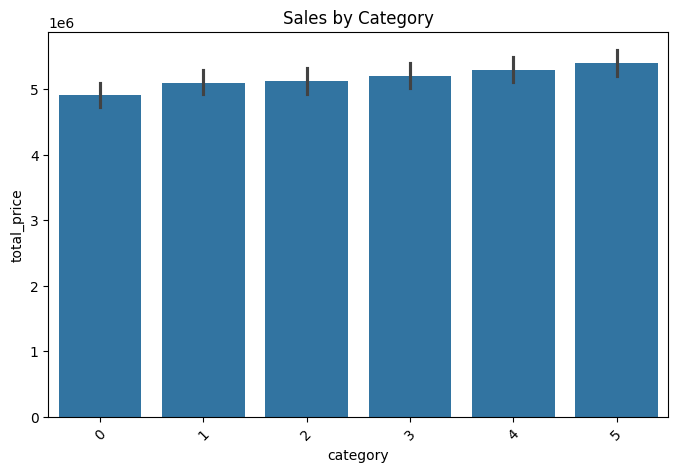

In [27]:
# Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='total_price', data=df, estimator=sum)
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()

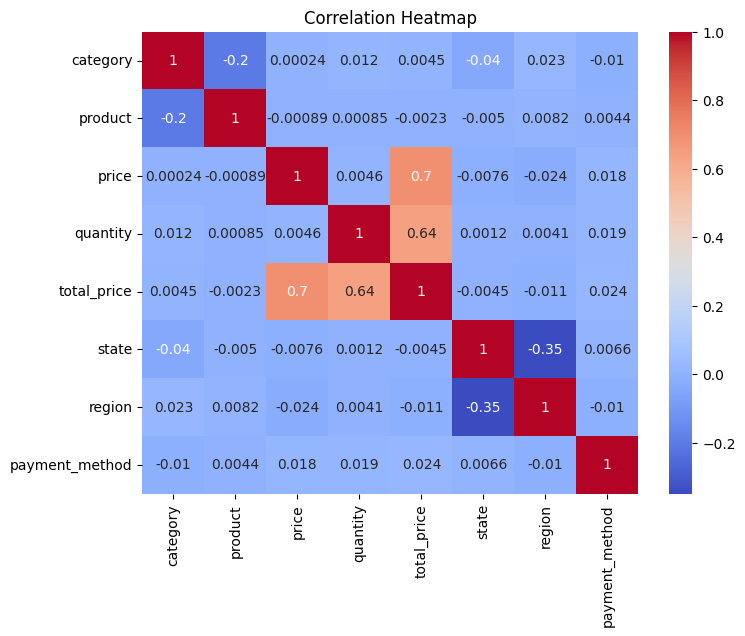

In [29]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(['order_id','customer_id','order_date'], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

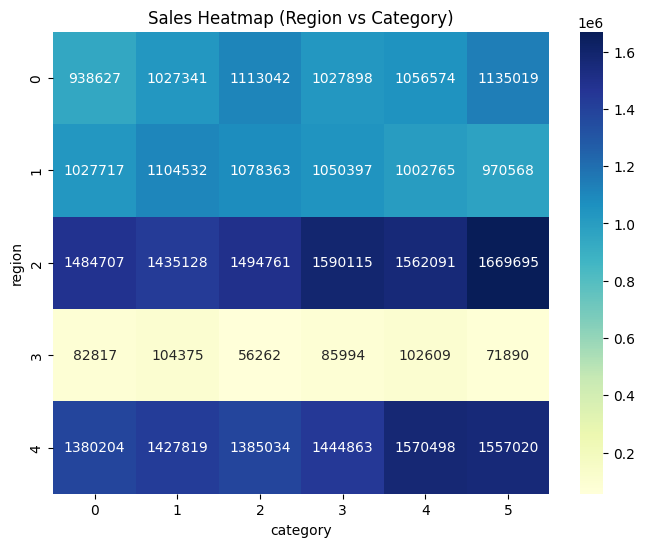

In [30]:
# Pivot Table Heatmap (Region vs Category)
pivot = df.pivot_table(values='total_price', index='region', columns='category', aggfunc='sum')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap (Region vs Category)")
plt.show()